In [161]:
from random import random
import json
import pandas as pd
import numpy as np

#Process data for modelling
all_data = pd.read_csv('./MODEL.CSV')
train_set = all_data.iloc[:len(all_data['EXPORT_VOLUME'].values)-48]
validation_set = all_data.iloc[len(all_data['EXPORT_VOLUME'].values)-48:len(all_data['EXPORT_VOLUME'].values)]

#data = [x + random() for x in range(1, 100)]
training_data = train_set['EXPORT_VOLUME'].values

print('training records :' ,  len(training_data))
print('validation records : ' , len(validation_set))

training records : 108
validation records :  48


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


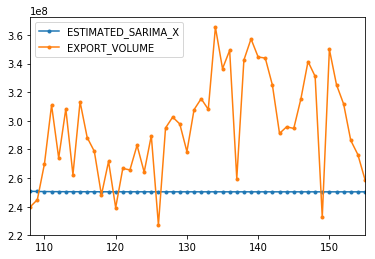

In [150]:
#Auto Regressive Moving Average (ARMA)
from statsmodels.tsa.arima_model import ARMA


#yhats = pd.Series(predictions, index= validation_set.index)
#validation_set['ESTIMATED_ARMA'] = yhats
#validation_set[['ESTIMATED_ARMA','EXPORT_VOLUME']].plot(style='.-')
predictions = []
my_training_data = training_data;
for  key,value in validation_set.iterrows():
    my_training_data = np.append(my_training_data, training_data,validation_set.loc[key]['EXPORT_VOLUME'])
    # fit model
    model = ARMA(my_training_data, order=(2, 1))
    model_fit = model.fit(disp=False)
    # make prediction
    predictions = np.append(predictions, model_fit.predict(len(my_training_data),len(my_training_data)))

yhats = pd.Series(predictions, index= validation_set.index)
validation_set['ESTIMATED_SARIMA_X'] = yhats
validation_set[['ESTIMATED_SARIMA_X','EXPORT_VOLUME']].plot(style='.-')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


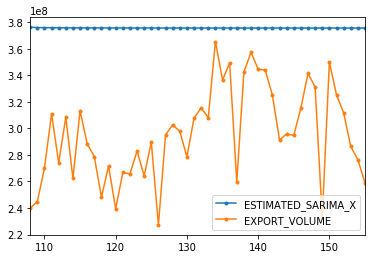

In [149]:
validation_set['ESTIMATED_SARIMA_X'] = yhats* 1.5
validation_set[['ESTIMATED_SARIMA_X','EXPORT_VOLUME']].plot(style='.-')

In [200]:
#SARIMA with Exogenous regressors
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset

train_exog = train_set['SICOM_PRICE'].values
training_data = train_set['EXPORT_VOLUME'].values;

validation_exog = pd.DataFrame(validation_set['SICOM_PRICE'])
predictions = []



for  key,value in validation_set.iterrows():
    training_data = np.append(training_data, validation_set.loc[key]['EXPORT_VOLUME'])
    train_exog = np.append(train_exog ,validation_set.loc[key]['SICOM_PRICE'])
    
    # fit model
    model = SARIMAX(training_data, exog=train_exog, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
    model_fit = model.fit(disp=False)

    # make prediction
    pred =  model_fit.predict(len(training_data),len(training_data), exog=pd.Series(validation_set.loc[key]['SICOM_PRICE']))
    predictions = np.append(predictions, pred)


# make prediction
yhats = pd.Series(predictions, index= validation_set.index)
validation_set['ESTIMATED_SARIMA_X'] = yhats
validation_set[['ESTIMATED_SARIMA_X','EXPORT_VOLUME']].plot(style='.-')

ValueError: Provided exogenous values are not of the appropriate shape. Required (1, 1), got (1,).

In [197]:
pd.Series([validation_set.loc[key]['SICOM_PRICE']])

0    1.66
dtype: float64